In [1]:
#Atividade de IA, 6ºADS, Anna Y. Yamada

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import random
import glob
import PIL
from IPython import display
from PIL import Image 
import imageio

import tqdm
from tqdm import tqdm
from joblib import Parallel, delayed

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp, resize
from skimage import img_as_ubyte

In [2]:
import pathlib,os
dataset_url = os.path.join('../input/ganyu-genshin-impact-anime-faces-gan-training/ganyu/ganyu-final/')
data_dir = pathlib.Path(dataset_url)
os.path.exists(dataset_url)
#colocando o caminho do dataset já importado em uma variavel para poder mexer nas imagens

True

In [3]:
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)
#contando as imagens para ver se o caminho está correto

850


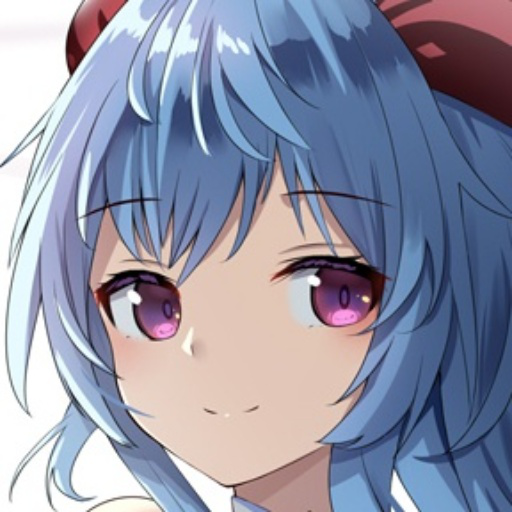

In [4]:
ganyu = list(data_dir.glob('*.jpg'))
PIL.Image.open(str(ganyu[15]))
#listando imagens e abrindo uma específica

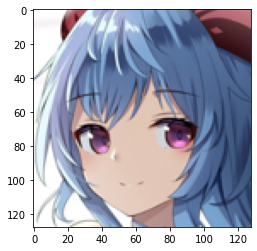

In [5]:
image = PIL.Image.open(str(ganyu[15]))
image = image.resize((128,128))
plt.imshow(image)
#redimensionando e abrindo a imagem

In [6]:
epochs = 130
batch_size = 32
img_height = 180
img_width = 180
#definindo 

In [7]:
def anticlockwise_rotation(image):
    angle = random.randint(0,100)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle = random.randint(0,100)
    return rotate(image, -angle)

def blur_image(image):
    return cv2.GaussianBlur(image, (11,11),0.2)

AUG_IMAGE_LIST = []

transformations = {'rotate anticlockwise': anticlockwise_rotation,
                   'rotate clockwise': clockwise_rotation,
                   'blurring image':blur_image
                 } 
#definindo ações para realizar com a imagem (rotação antihorária, horária ou desfocar)
#colocando em uma lista 'transformations' para que possa ser usada randomicamente

In [8]:
def image_augmention_set(dataset_url, AUG_IMAGE_LIST, n_image): 
    image = dataset_url + (os.listdir(dataset_url))[n_image - 1]
    image = io.imread(image)
    image = resize(image, (img_width, img_height))
    total_transformations = random.randint(1, len(transformations)-2)
    
    for transformation in range(3): 
        key = random.choice(list(transformations))
        transformed_image = transformations[key](image)
#escolhe metodo aleatorio das transformações e aplica na imagem 'image' atual

        transformed_image = img_as_ubyte(transformed_image) 
        AUG_IMAGE_LIST.append(transformed_image)
        
_1 = Parallel(n_jobs=-1, backend='threading')(
    delayed(image_augmention_set)(dataset_url, AUG_IMAGE_LIST, n_image) for n_image in tqdm(range(len(os.listdir(dataset_url)))))
#vai realizar a def nas imagens do dataset, o que pode demorar um pouco

100%|██████████| 850/850 [00:20<00:00, 42.34it/s]


In [9]:
images = np.array(AUG_IMAGE_LIST) / 255
images = images.reshape(-1, img_width, img_height, 3)
print("Total de imagens: {}".format(images.shape[0])), print(images.shape)
#Retorna a quantidade de imagens carregada no ultimo bloco

Total de imagens: 2550
(2550, 180, 180, 3)


(None, None)

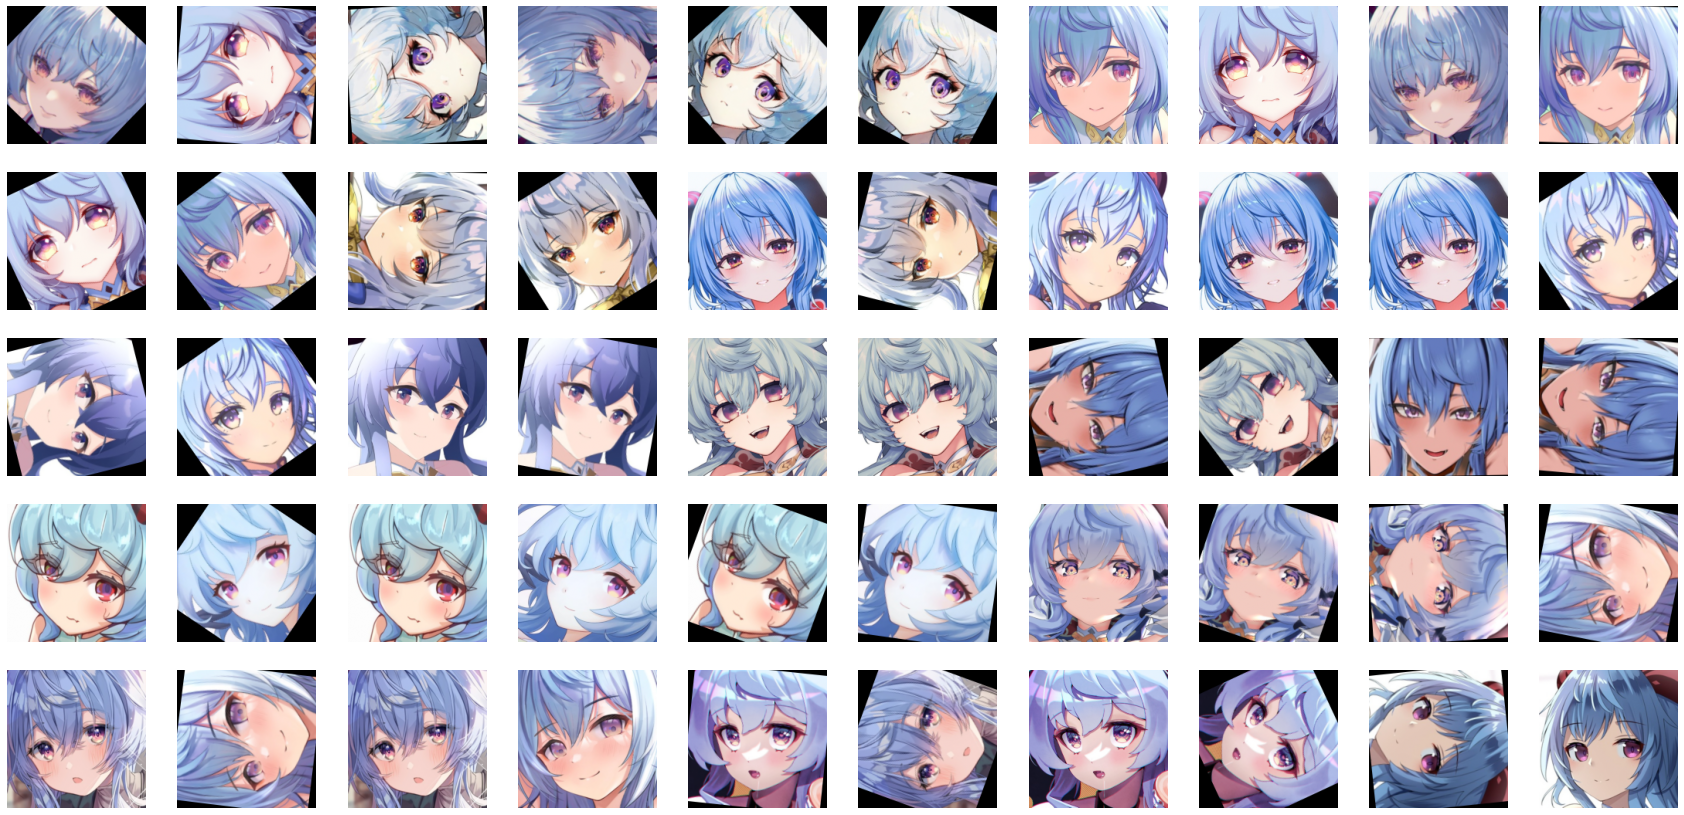

In [10]:
plt.figure(1, figsize=(30, 30))
for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()
#mostra as 50 primeiras imagens carregadas no bloco anterior